# Prueba para joint 1 con movimiento sinusoidal
## Coding
### Importando librerías


In [2]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Plotting data

### Muestra de data para una ventana de 3000 datos

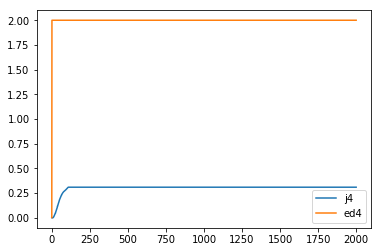

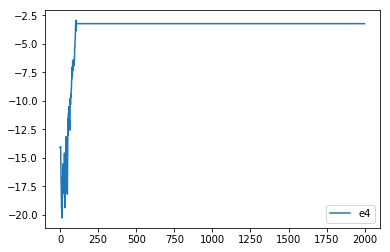

In [3]:
df = pd.read_csv('torque_test.csv')
#df_eval = pd.read_csv('evaluation_data.csv')
df_val = pd.read_csv('validation_data_6.csv')
fig1 = plt.figure()
df.j4.plot()
df.ed4.plot(); plt.legend(loc='best')
fig2 = plt.figure(); df.e4[1:2000].plot(); plt.legend(loc='best')

In [7]:
df

,Unnamed: 0,j1,j2,j3,j4,j5,j6,j7,jd1,jd2,...,jd5,jd6,jd7,e1,e2,e3,e4,e5,e6,e7
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,-0.002104,-0.001510,0.000021,-0.003979,0.003341,-0.004884,-0.001673,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,0.104,-44.324,-4.556,-13.812,2.324,-0.700,-0.024
2,2,-0.002104,-0.001510,0.000021,-0.003979,0.003341,-0.004884,-0.001673,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,0.156,-44.268,-4.600,-13.972,2.296,-0.708,0.000
3,3,-0.002104,-0.001510,0.000021,-0.003979,0.003341,-0.004884,-0.001673,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,0.052,-44.324,-4.576,-13.856,2.276,-0.708,-0.012
4,4,-0.002309,-0.001510,0.000166,-0.004269,0.002928,-0.004884,-0.001467,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,-3.880,-45.456,-4.392,-15.388,2.420,-0.720,0.056
5,5,-0.002721,-0.001407,0.000743,-0.006010,0.001288,-0.004058,0.001813,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,-7.600,-48.752,-4.440,-18.384,3.232,-1.228,0.044
6,6,-0.003241,-0.001304,0.002034,-0.007742,0.001081,-0.004884,0.006951,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,-11.800,-52.800,-4.160,-19.596,3.604,-1.704,0.108
7,7,-0.004271,-0.001304,0.003910,-0.009493,0.001895,-0.007350,0.013923,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,-16.004,-55.120,-5.548,-20.788,3.312,-1.288,0.116
8,8,-0.005506,-0.001510,0.005787,-0.011956,0.001895,-0.009415,0.022341,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,-20.364,-56.740,-6.244,-20.284,3.376,-1.220,0.136
9,9,-0.007364,-0.002333,0.007944,-0.013978,0.002722,-0.011881,0.032605,-0.891148,-0.277998,...,0.378086,-0.404293,1.026457,-24.508,-57.388,-5.988,-21.128,3.468,-1.344,-0.012


In [5]:
delta_j4 = df.j4 - df.jd4
fig3 = plt.figure(); delta_j4[1:600].plot(); plt.legend(loc='best')
#delta_j7.head()
df['delta_j4'] = delta_j4

AttributeError: 'DataFrame' object has no attribute 'jd4'

### Plotting delta rad vs effort

<Figure size 432x288 with 0 Axes>

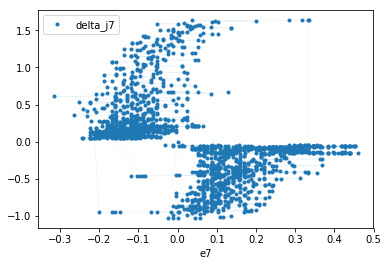

In [5]:
fig4 = plt.figure(); df[0:3000].plot(x = 'e7', y = 'delta_j7', marker='.',lw=0.05); plt.legend(loc='best')

### Prueba de validación para modelo FFNN
#### Solo Neuronas Lineales (model1)
Se utiliza un modelo de 1 input layer de 15 neuronas lineales, 2 hidden layers de 15 neuronas lineales y 1 output layer de 2 neuronas lineales.  

In [9]:
# Generating model
model1 = Sequential()
model1.add(Dense(units=10, activation='linear', input_dim=2))
model1.add(Dense(units=10, activation='linear'))
model1.add(Dense(units=10, activation='linear'))
model1.add(Dense(units=1, activation='linear'))

model1.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q_tmp = df.j7.values.reshape(number_training_data,1)
T_tmp = df.e7.values.reshape(number_training_data,1)
qd_tmp = df.jd7
x_train = np.concatenate([q_tmp, T_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)
#print x_train.shape
#print y_train.shape


#### Feeding data

In [27]:
model1.fit(x_train, y_train, epochs=50, batch_size=50)

Epoch 1/50
5001/5001 [==============================] - 0s 78us/step - loss: 0.0944 - acc: 1.9996e-04
Epoch 2/50
5001/5001 [==============================] - 0s 64us/step - loss: 0.0937 - acc: 1.9996e-04
Epoch 3/50
5001/5001 [==============================] - 0s 66us/step - loss: 0.0940 - acc: 1.9996e-04
Epoch 4/50
5001/5001 [==============================] - 0s 74us/step - loss: 0.0936 - acc: 1.9996e-04
Epoch 5/50
5001/5001 [==============================] - 0s 65us/step - loss: 0.0941 - acc: 1.9996e-04
Epoch 6/50
5001/5001 [==============================] - 0s 66us/step - loss: 0.0936 - acc: 1.9996e-04
Epoch 7/50
5001/5001 [==============================] - 0s 79us/step - loss: 0.0938 - acc: 1.9996e-04
Epoch 8/50
5001/5001 [==============================] - 0s 73us/step - loss: 0.0948 - acc: 1.9996e-04
Epoch 9/50
5001/5001 [==============================] - 0s 81us/step - loss: 0.0939 - acc: 1.9996e-04
Epoch 10/50
5001/5001 [==============================] - 0s 71us/step - loss: 0.09

In [11]:
(number_evaluation_data, _) = df_eval.shape
q_tmp = df_eval.j7.values.reshape(number_evaluation_data,1)
T_tmp = df_eval.e7.values.reshape(number_evaluation_data,1)
qd_tmp = df_eval.jd7
x_eval = np.concatenate([q_tmp, T_tmp], axis =1)
y_eval = qd_tmp.values.reshape(number_evaluation_data,1)

In [12]:
model1.evaluate(x_eval, y_eval, batch_size=50)

5001/5001 [==============================] - 0s 43us/step


[0.09600156076569792, 0.00019996000352894586]

In [20]:
(number_validation_data, _) = df_val.shape
q_tmp = df_val.j7.values.reshape(number_validation_data,1)
T_tmp = df_val.e7.values.reshape(number_validation_data,1)
qd_tmp = df_val.jd7
x_val = np.concatenate([q_tmp, T_tmp], axis =1)
y_val = qd_tmp.values.reshape(number_validation_data,1)

In [28]:
y1_pred = model1.predict(x_val)

In [29]:
df_val['y1_pred'] = y1_pred

<Figure size 432x288 with 0 Axes>

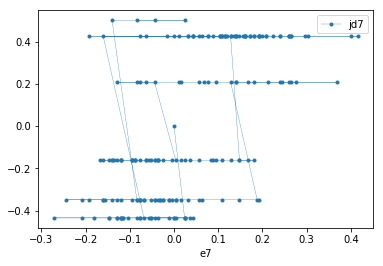

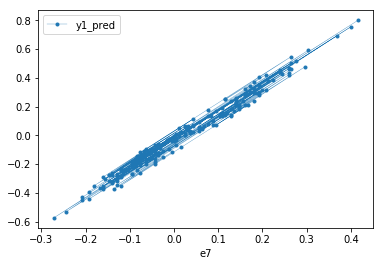

In [30]:
fig5 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.3)
df_val[0:200].plot(x = 'e7', y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

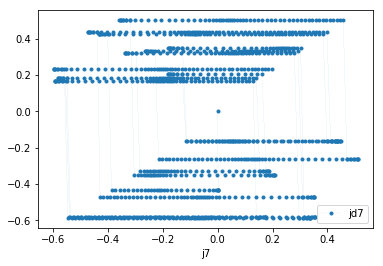

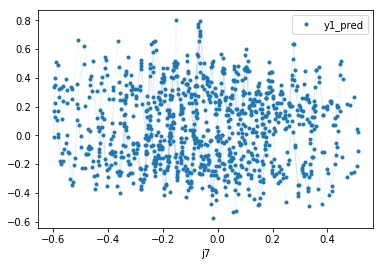

In [31]:
fig6 = plt.figure(); df_val[0:1000].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:1000].plot(x = 'j7', y = 'y1_pred', marker='.',lw=0.05); plt.legend(loc='best')

In [23]:
print x_train.shape
print df_val.shape
print df_eval.shape

(50001, 2)
(20001, 23)
(10001, 22)


### Neuronas  con función de activación sigmoid
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas sigmoides y 1 output layer de 2 neuronas lineales.  

In [18]:
model2 = Sequential()
model2.add(Dense(units=20, activation='linear', input_dim=2))
model2.add(Dense(units=20, activation='sigmoid'))
model2.add(Dense(units=20, activation='sigmoid'))
model2.add(Dense(units=1, activation='linear'))

model2.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])


#### Feeding data

In [19]:
model2.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 81us/step - loss: 0.0178 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 76us/step - loss: 2.6640e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 77us/step - loss: 2.0148e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 4s 75us/step - loss: 1.8707e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 4s 74us/step - loss: 1.8417e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.7713e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.7773e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 76us/step - loss: 1.7316e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 4s 76us/step - loss: 1.7059e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [=======

In [20]:
(number_evaluation_data, _) = df_eval.shape
q_tmp = df_eval.j7.values.reshape(number_evaluation_data,1)
T_tmp = df_eval.e7.values.reshape(number_evaluation_data,1)
qd_tmp = df_eval.jd7
x_eval = np.concatenate([q_tmp, T_tmp], axis =1)
y_eval = qd_tmp.values.reshape(number_evaluation_data,1)

In [21]:
model2.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 50us/step


[5.409905237837468e-05, 9.998999876494932e-05]

In [22]:
(number_validation_data, _) = df_val.shape
q_tmp = df_val.j7.values.reshape(number_validation_data,1)
T_tmp = df_val.e7.values.reshape(number_validation_data,1)
qd_tmp = df_val.jd7
x_val = np.concatenate([q_tmp, T_tmp], axis =1)
y_val = qd_tmp.values.reshape(number_validation_data,1)

In [23]:
y2_pred = model2.predict(x_val)

In [24]:
df_val['y2_pred'] = y2_pred

KeyError: 'y2_pred'

<Figure size 432x288 with 0 Axes>

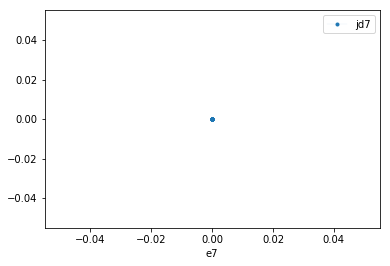

In [31]:
fig7 = plt.figure(); df_val[400:3000].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[400:3000].plot(x = 'e7', y = 'y2_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

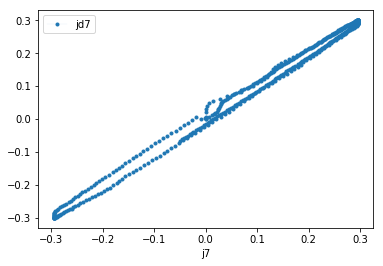

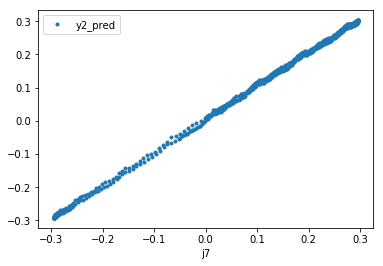

In [27]:
fig8 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y2_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación tanh
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas tanh y 1 output layer de 2 neuronas lineales.  

In [28]:
model3 = Sequential()
model3.add(Dense(units=20, activation='linear', input_dim=2))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=1, activation='linear'))

model3.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q_tmp = df.j7.values.reshape(number_training_data,1)
T_tmp = df.e7.values.reshape(number_training_data,1)
qd_tmp = df.jd7
x_train = np.concatenate([q_tmp, T_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)
#print x_train.shape

In [29]:
model3.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 5s 95us/step - loss: 2.8819e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 88us/step - loss: 1.3268e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 83us/step - loss: 1.3604e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 5s 92us/step - loss: 1.4294e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 5s 93us/step - loss: 1.4052e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 87us/step - loss: 1.4676e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 5s 90us/step - loss: 1.4271e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 88us/step - loss: 1.4547e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 5s 90us/step - loss: 1.4136e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [30]:
model3.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 44us/step


[0.00017780011091296104, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

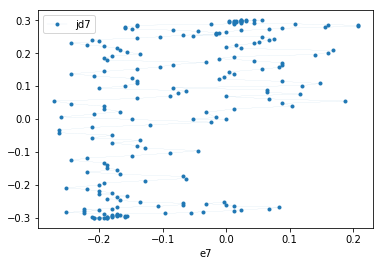

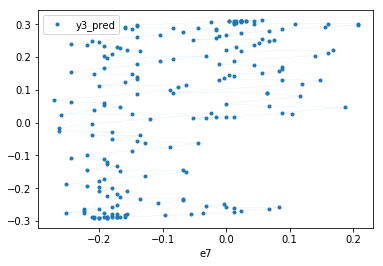

In [31]:
y3_pred = model3.predict(x_val)
df_val['y3_pred'] = y3_pred
fig9 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

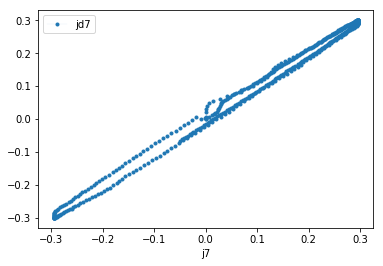

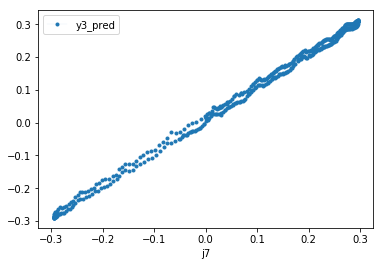

In [35]:
fig10 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación elu (model 4)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas elu y 1 output layer de 2 neuronas lineales.  

In [36]:
model4 = Sequential()
model4.add(Dense(units=20, activation='linear', input_dim=2))
model4.add(Dense(units=20, activation='elu'))
model4.add(Dense(units=20, activation='elu'))
model4.add(Dense(units=1, activation='linear'))

model4.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

In [37]:
model4.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 75us/step - loss: 1.5998e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 3s 69us/step - loss: 1.5754e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.5190e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 3s 66us/step - loss: 1.5352e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.4887e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.4812e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 3s 69us/step - loss: 1.4470e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 3s 70us/step - loss: 1.3959e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 3s 70us/step - loss: 1.4177e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [38]:
model4.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 50us/step


[3.3041127614063134e-05, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

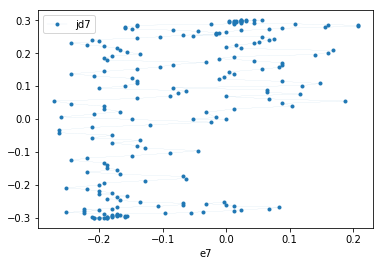

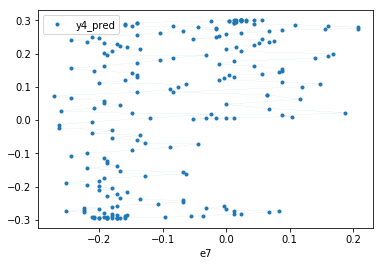

In [39]:
y4_pred = model4.predict(x_val)
df_val['y4_pred'] = y4_pred
fig11 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

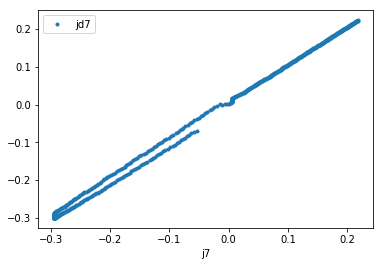

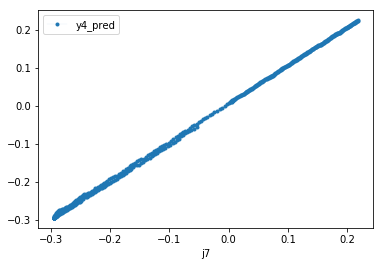

In [43]:
fig12 = plt.figure(); df_val[500:1000].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[500:1000].plot(x = 'j7', y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación LeakyReLU (model 5)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas LeakyReLU y 1 output layer de 2 neuronas lineales.  

In [41]:
model5 = Sequential()
model5.add(Dense(units=20, activation='linear', input_dim=2))
model5.add(Dense(units=20, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=20, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=1, activation='linear'))

model5.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [42]:
model5.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 83us/step - loss: 6.9236e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.1412e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 71us/step - loss: 1.0597e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.0698e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.1274e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.0566e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 4s 74us/step - loss: 1.1525e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 71us/step - loss: 1.0558e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.0168e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [44]:
model5.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 1s 53us/step


[3.595215256979881e-05, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

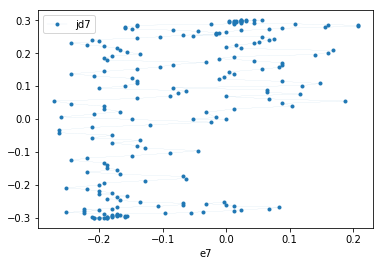

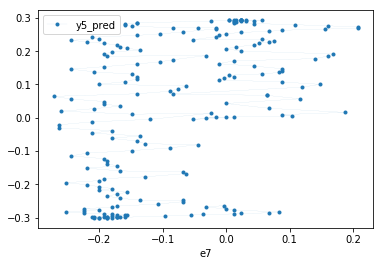

In [45]:
y5_pred = model5.predict(x_val)
df_val['y5_pred'] = y5_pred
fig13 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

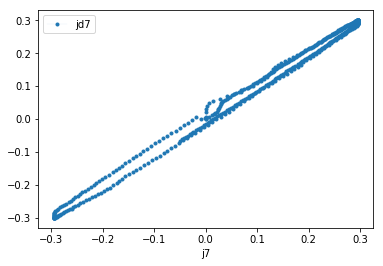

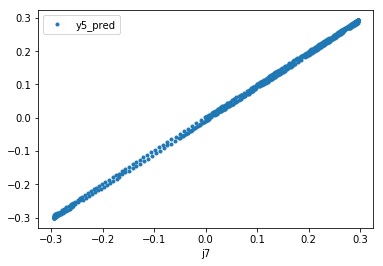

In [47]:
fig14 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

In [28]:
from keras.models import Sequential, Model
import keras

from keras.layers import Dense, Activation, LSTM, Input
inputs = Input(shape=(None, 2))
first_lstm = LSTM(30, return_state=True)
outputs, state_h1, state_c1 = first_lstm(inputs)
# We discard `encoder_outputs` and only keep the states.
#second_lstm = LSTM(30, return_state=True)
#outputs, state_h2, state_c2 = second_lstm(outputs)
dense_layer = Dense(1, activation='linear')
outputs = dense_layer(outputs)

model = Model(inputs, outputs)
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])
#model1.evaluate(x_eval, y_eval, batch_size=50)


In [31]:
x_tmp = x_train.reshape(50001,2,1)
y_tmp = y_train.reshape(50001,2,1)

ValueError: cannot reshape array of size 50001 into shape (50001,2,1)

In [27]:
model.fit(x_train.reshape(50001,2,1), y_train.reshape(50001,2,1), epochs=10, batch_size=50)

ValueError: cannot reshape array of size 50001 into shape (50001,2,1)

In [26]:
x_train.reshape(50001,2,1)

array([[[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[-2.10351562e-03],
        [ 0.00000000e+00]],

       [[-2.10351562e-03],
        [ 5.20000000e-02]],

       ...,

       [[ 1.46682617e-01],
        [-1.70000000e+00]],

       [[ 1.42559570e-01],
        [-2.28400000e+00]],

       [[ 1.38745117e-01],
        [-1.32800000e+00]]])